In [1]:
from lcls_tools.common.measurements.screen_profile import ScreenBeamProfileMeasurement
from lcls_tools.common.devices.tcav import TCAV
from lcls_tools.common.devices.reader import create_screen, create_tcav
from automatic_phase_scan import MLTCAVPhasing
from xopt import Xopt, Evaluator, VOCS

In [2]:
tcav = create_tcav('DIAG0', 'TCXDG0')
screen = create_screen('DIAG0', 'OTRDG02')
meas = ScreenBeamProfileMeasurement(device = screen)


In [3]:
auto_phase = MLTCAVPhasing(tcav = tcav, beamsize_measurement= meas)

In [4]:
vocs = VOCS(
    variables={"phase": [0, 360]},
    constraints={"min_intensity": ['GREATER_THAN', 0]},
    objectives={"f": "MINIMIZE"}
)

In [5]:
auto_phase.create_xopt_object(vocs = vocs)


            Xopt
________________________________
Version: 2.5.5
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: automatic_phase_scan.MLTCAVPhasing._evaluate
  function_kwargs: {}
  max_workers: 1
  vectorized: false
generator:
  beta: 2.0
  computation_time: null
  custom_objective: null
  fixed_features: null
  gp_constructor:
    covar_modules: {}
    custom_noise_prior: null
    mean_modules: {}
    name: standard
    trainable_mean_keys: []
    transform_inputs: true
    use_cached_hyperparameters: false
    use_low_noise_prior: true
  max_travel_distances: null
  model: null
  n_candidates: 1
  n_interpolate_points: null
  n_monte_carlo_samples: 128
  name: upper_confidence_bound
  numerical_optimizer:
    max_iter: 2000
    max_time: null
    n_restarts: 20
    name: LBFGS
  supports_batch_generation: true
  turbo_controller: null
  use_cuda: false
max_evaluations: null
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants: {}
  const

/Users/cgarnier/anaconda3/envs/linac-simulation/lib/python3.11/site-packages/xopt/generators/bayesian/upper_confidence_bound.py:36: UserWarning: Using UpperConfidenceBoundGenerator with constraints will lead to invalid values if the base acquisition function has negative values. Use with caution.
  warnings.warn(


In [6]:
res = auto_phase.acquire_nominal_centroid(.135)

/Users/cgarnier/Desktop/sim/lcls-tools/lcls_tools/common/data/fit/projection.py:82: OptimizeWarning: Initial guess is not within the specified bounds
  res = scipy.optimize.minimize(


In [7]:
print(res)

[971.40650448 735.4334767 ]


INPUTS dict
{'phase': 180.0}


/Users/cgarnier/Desktop/sim/lcls-tools/lcls_tools/common/data/fit/projection.py:82: OptimizeWarning: Initial guess is not within the specified bounds
  res = scipy.optimize.minimize(


1.0000000094682486
INPUTS dict
{'phase': 270.0}
0.9999999860702559
INPUTS dict
{'phase': 360.0}
1.0000000033947007
INPUTS dict
{'phase': 119.71454464902727}
0.9999999553146325
INPUTS dict
{'phase': 0.0}
0.9999999902482501
INPUTS dict
{'phase': 42.215588399889995}
0.9999999814772637
INPUTS dict
{'phase': 206.2650666040464}
1.00000000441953
INPUTS dict
{'phase': 360.0}
1.0000000033947007


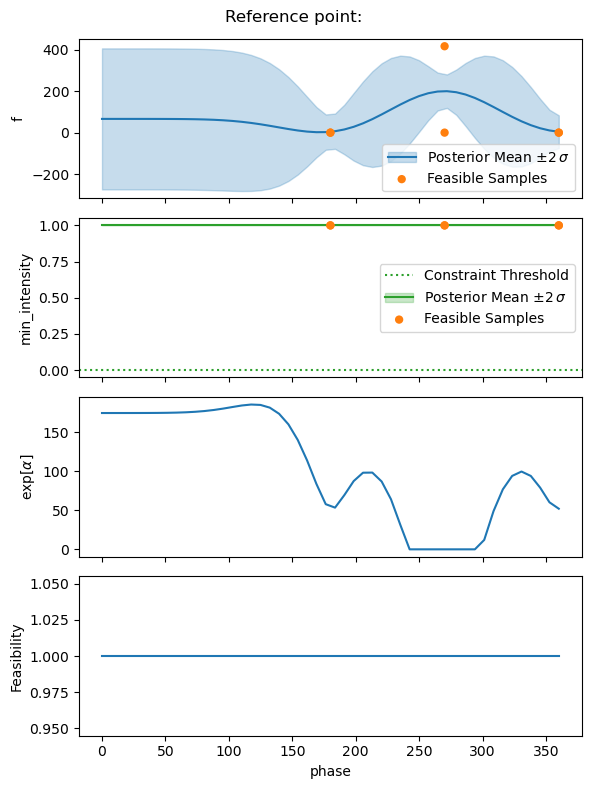

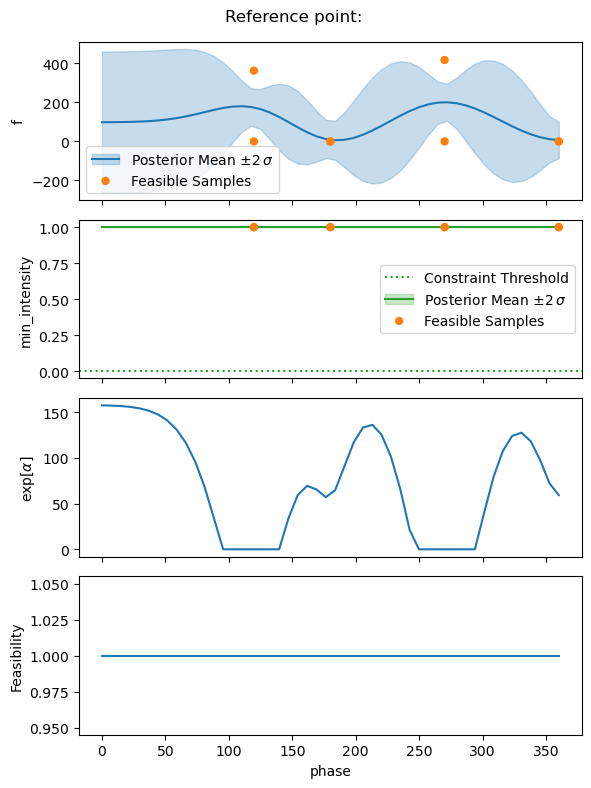

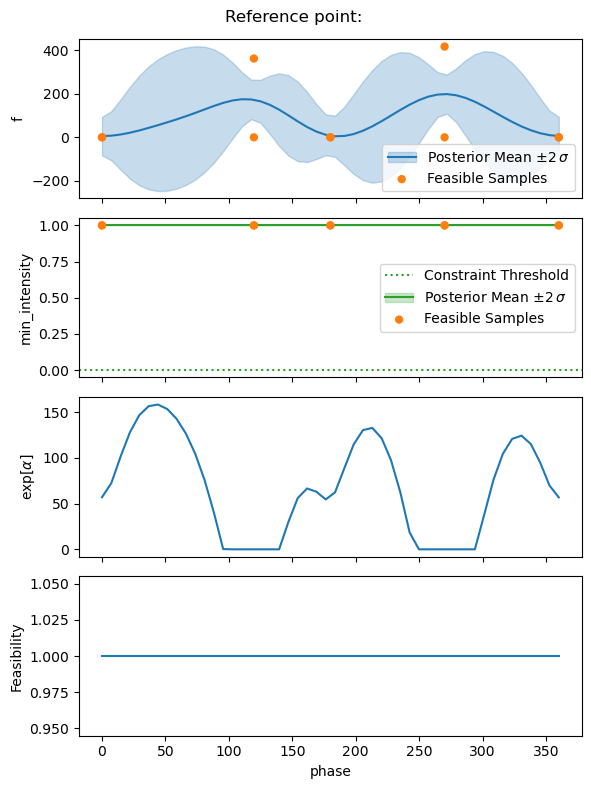

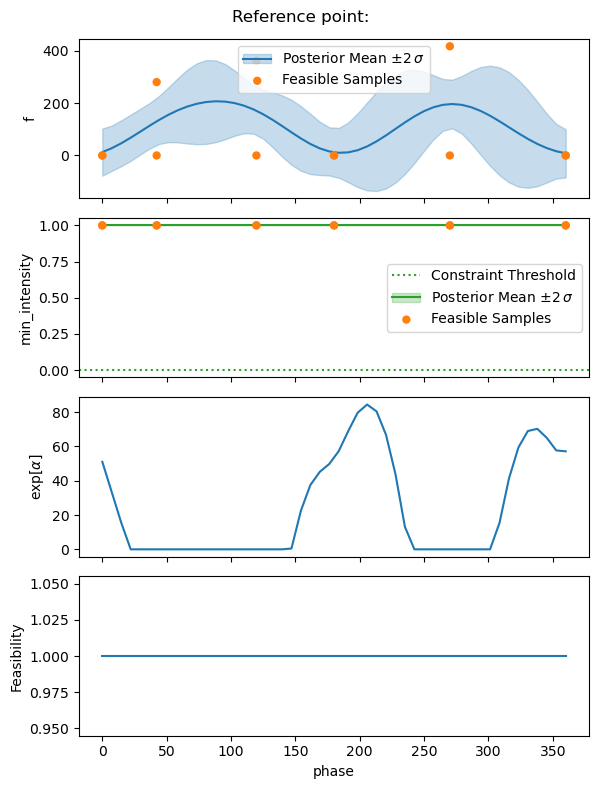

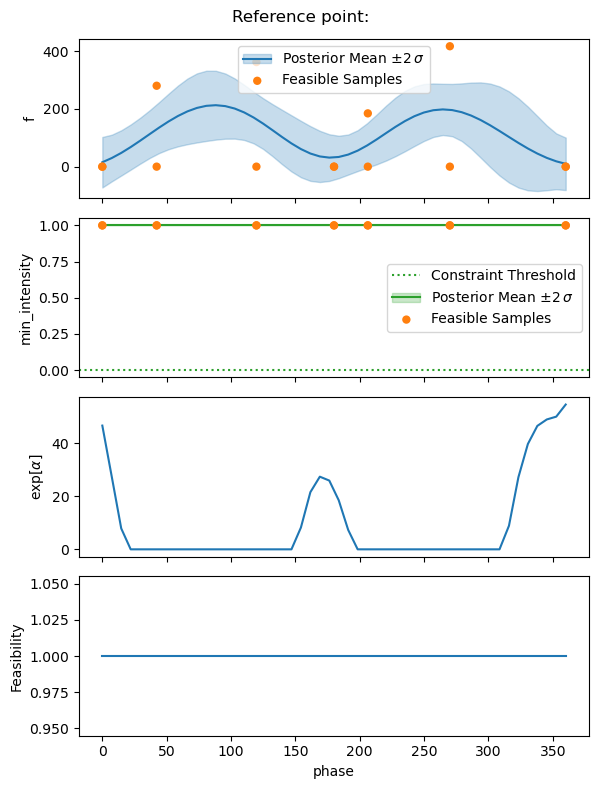

In [8]:
auto_phase.perform_beamsize_measurements()

In [9]:
auto_phase.X.data

,phase,f,min_intensity,xopt_runtime,xopt_error
0,180.000000,0.00022,1.0,2.777149,False
1,180.000000,0.00011,1.0,2.777149,False
2,270.000000,417.170833,1.0,2.826759,False
3,270.000000,0.00028,1.0,2.826759,False
4,360.000000,0.001314,1.0,2.774020,False
5,360.000000,0.000239,1.0,2.774020,False
6,119.714545,362.316066,1.0,2.894405,False
7,119.714545,0.000153,1.0,2.894405,False
8,0.000000,0.001241,1.0,2.791992,False
9,0.000000,0.000239,1.0,2.791992,False
